### Dezembro 2020

In [1]:
import pandas_datareader as web
import pandas as pd
import numpy as np

In [2]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-12-01', end='2021-01-31') 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,0.003572,0.003269,0.003551,0.003335,80163603,0.003335
2020-12-02,0.003436,0.003293,0.003335,0.003374,58705661,0.003374
2020-12-03,0.003500,0.003352,0.003375,0.003428,47907032,0.003428
2020-12-04,0.003447,0.003285,0.003429,0.003298,45062222,0.003298
2020-12-05,0.003414,0.003268,0.003297,0.003397,43386583,0.003397


<AxesSubplot:xlabel='Date'>

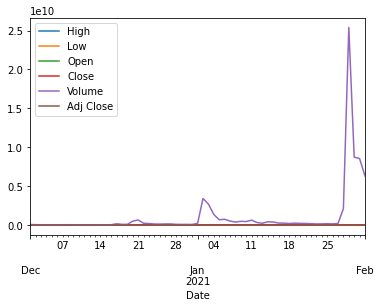

In [3]:
doge = df
doge.plot()

In [4]:
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2020-12-01,0.003335
2020-12-02,0.003374
2020-12-03,0.003428
2020-12-04,0.003298
2020-12-05,0.003397


In [5]:
# Prever n dias no futuro
predic_day = 25 #7 dias

# cria uma coluna previsao com dados dos proximos 7. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 7 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [6]:
doge.head()

,Close,Prediction
Date,,
2020-12-01,0.003335,0.004494
2020-12-02,0.003374,0.004548
2020-12-03,0.003428,0.004592
2020-12-04,0.003298,0.004486
2020-12-05,0.003397,0.004636


In [7]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.003335],
       [0.003374],
       [0.003428],
       [0.003298],
       [0.003397],
       [0.003388],
       [0.003342],
       [0.003179],
       [0.003158],
       [0.003105],
       [0.003079],
       [0.003163],
       [0.003256],
       [0.003231],
       [0.003206],
       [0.003416],
       [0.00373 ],
       [0.003858],
       [0.003927],
       [0.004625],
       [0.004787],
       [0.004508],
       [0.003768],
       [0.00457 ],
       [0.004582],
       [0.004494],
       [0.004548],
       [0.004592],
       [0.004486],
       [0.004636],
       [0.004682],
       [0.005685],
       [0.010615],
       [0.009771],
       [0.009767],
       [0.00992 ],
       [0.010465]])

In [8]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.004494, 0.004548, 0.004592, 0.004486, 0.004636, 0.004682,
       0.005685, 0.010615, 0.009771, 0.009767, 0.00992 , 0.010465,
       0.009742, 0.009846, 0.010194, 0.00986 , 0.008835, 0.008063,
       0.008616, 0.009397, 0.009369, 0.009265, 0.009067, 0.009171,
       0.009098, 0.00906 , 0.008166, 0.008524, 0.008579, 0.008727,
       0.008383, 0.008255, 0.007482, 0.012555, 0.047162, 0.028176,
       0.037196])

In [9]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [10]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.19261041260148537


In [11]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.004682  0.010194  0.00889   0.010194  0.008063  0.009397  0.009767
 0.0100185]

Os valores reais para Doge Coin sao: [0.004548 0.009771 0.009369 0.010465 0.008616 0.008727 0.00992  0.047162]


In [12]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(25)["Close"])


In [13]:
x_val #os ultimos 7 valores utilizados para realizar a previsao.

[0.0032309999223798513,
 0.0032059999648481607,
 0.003415999934077263,
 0.0037299999967217445,
 0.0038580000400543213,
 0.003926999866962433,
 0.004625000059604645,
 0.004786999896168709,
 0.0045079998672008514,
 0.003768000053241849,
 0.004569999873638153,
 0.0045819999650120735,
 0.004494000226259232,
 0.004548000171780586,
 0.004592000041157007,
 0.004486000165343285,
 0.004635999910533428,
 0.004681999795138836,
 0.005685000214725733,
 0.010614999569952488,
 0.009770999662578106,
 0.009766999632120132,
 0.009920000098645687,
 0.010464999824762344,
 0.00974200014024973]

In [14]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(25)["Prediction"]) 

Previsto: [0.01002]
Previsto: [0.010194]
Previsto: [0.004592]
Previsto: [0.008063]
Previsto: [0.008063]
Previsto: [0.008063]
Previsto: [0.009397]
Previsto: [0.00889]
Previsto: [0.0091625]
Previsto: [0.008063]
Previsto: [0.0091345]
Previsto: [0.009098]
Previsto: [0.00906]
Previsto: [0.008632]
Previsto: [0.008524]
Previsto: [0.0088195]
Previsto: [0.009397]
Previsto: [0.00889]
Previsto: [0.008255]
Previsto: [0.007482]
Previsto: [0.0100185]
Previsto: [0.0100185]
Previsto: [0.017829]
Previsto: [0.007482]
Previsto: [0.0100185]
----------
Preco Anterior Date
2020-12-14    0.009846
2020-12-15    0.010194
2020-12-16    0.009860
2020-12-17    0.008835
2020-12-18    0.008063
2020-12-19    0.008616
2020-12-20    0.009397
2020-12-21    0.009369
2020-12-22    0.009265
2020-12-23    0.009067
2020-12-24    0.009171
2020-12-25    0.009098
2020-12-26    0.009060
2020-12-27    0.008166
2020-12-28    0.008524
2020-12-29    0.008579
2020-12-30    0.008727
2020-12-31    0.008383
2021-01-01    0.008255
2021-

### Janeiro 2021:

In [15]:
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-01-01', end='2021-02-28') 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,0.005685,0.004615,0.004681,0.005685,228961515,0.005685
2021-01-02,0.013698,0.005584,0.005686,0.010615,3421562680,0.010615
2021-01-03,0.013867,0.009409,0.010602,0.009771,2707003608,0.009771
2021-01-04,0.011421,0.007878,0.009785,0.009767,1372398979,0.009767
2021-01-05,0.010219,0.008972,0.009767,0.009920,687256067,0.009920


<AxesSubplot:xlabel='Date'>

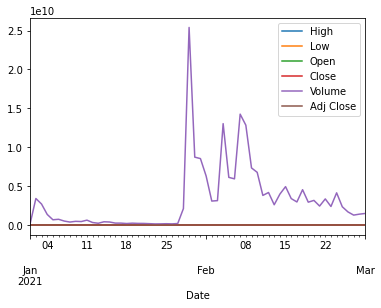

In [16]:
doge = df
doge.plot()

In [17]:
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2021-01-01,0.005685
2021-01-02,0.010615
2021-01-03,0.009771
2021-01-04,0.009767
2021-01-05,0.009920


In [18]:
# Prever n dias no futuro
predic_day = 25 #7 dias

# cria uma coluna previsao com dados dos proximos 7. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 7 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [19]:
doge.head()

,Close,Prediction
Date,,
2021-01-01,0.005685,0.008255
2021-01-02,0.010615,0.007482
2021-01-03,0.009771,0.012555
2021-01-04,0.009767,0.047162
2021-01-05,0.009920,0.028176


In [20]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.005685],
       [0.010615],
       [0.009771],
       [0.009767],
       [0.00992 ],
       [0.010465],
       [0.009742],
       [0.009846],
       [0.010194],
       [0.00986 ],
       [0.008835],
       [0.008063],
       [0.008616],
       [0.009397],
       [0.009369],
       [0.009265],
       [0.009067],
       [0.009171],
       [0.009098],
       [0.00906 ],
       [0.008166],
       [0.008524],
       [0.008579],
       [0.008727],
       [0.008383],
       [0.008255],
       [0.007482],
       [0.012555],
       [0.047162],
       [0.028176],
       [0.037196],
       [0.034875],
       [0.03152 ],
       [0.03712 ]])

In [21]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.008255, 0.007482, 0.012555, 0.047162, 0.028176, 0.037196,
       0.034875, 0.03152 , 0.03712 , 0.053289, 0.046935, 0.057595,
       0.078782, 0.078825, 0.07007 , 0.072896, 0.069676, 0.070069,
       0.06645 , 0.062537, 0.056591, 0.05352 , 0.049376, 0.059541,
       0.055139, 0.054384, 0.05598 , 0.053725, 0.047392, 0.056555,
       0.050167, 0.05048 , 0.050083, 0.048052])

In [22]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [23]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 
# Podemos reparar que a pontuacao do modelo comecou a ficar mais alta

0.8654891511779887


In [24]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.048052 0.070069 0.070069 0.069676 0.070069 0.039341 0.037196]

Os valores reais para Doge Coin sao: [0.050167 0.072896 0.078825 0.06645  0.07007  0.012555 0.007482]


In [25]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(25)["Close"])


In [26]:
x_val #os ultimos 7 valores utilizados para realizar a previsao.

[0.008834999985992908,
 0.008062999695539474,
 0.008616000413894653,
 0.009397000074386597,
 0.009368999861180782,
 0.009265000000596046,
 0.009066999889910221,
 0.009170999750494957,
 0.009097999893128872,
 0.009060000069439411,
 0.008166000247001648,
 0.008523999713361263,
 0.008578999899327755,
 0.008727000094950199,
 0.008383000269532204,
 0.008255000226199627,
 0.007482000160962343,
 0.012555000372231007,
 0.047162000089883804,
 0.028176000341773033,
 0.037195999175310135,
 0.03487500175833702,
 0.03152000159025192,
 0.03711999952793121,
 0.05328899994492531]

In [27]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(25)["Prediction"]) 

Previsto: [0.046935]
Previsto: [0.057595]
Previsto: [0.064079]
Previsto: [0.070069]
Previsto: [0.070069]
Previsto: [0.070069]
Previsto: [0.069676]
Previsto: [0.070069]
Previsto: [0.069676]
Previsto: [0.069676]
Previsto: [0.057595]
Previsto: [0.051448]
Previsto: [0.049376]
Previsto: [0.053238]
Previsto: [0.055139]
Previsto: [0.055139]
Previsto: [0.05598]
Previsto: [0.053725]
Previsto: [0.047722]
Previsto: [0.053319]
Previsto: [0.048052]
Previsto: [0.049266]
Previsto: [0.050083]
Previsto: [0.048052]
Previsto: [0.047722]
----------
Preco Anterior Date
2021-01-11    0.046935
2021-01-12    0.057595
2021-01-13    0.078782
2021-01-14    0.078825
2021-01-15    0.070070
2021-01-16    0.072896
2021-01-17    0.069676
2021-01-18    0.070069
2021-01-19    0.066450
2021-01-20    0.062537
2021-01-21    0.056591
2021-01-22    0.053520
2021-01-23    0.049376
2021-01-24    0.059541
2021-01-25    0.055139
2021-01-26    0.054384
2021-01-27    0.055980
2021-01-28    0.053725
2021-01-29    0.047392
2021-01-

### Fevereiro 2021:

In [28]:
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-02-01', end='2021-03-31') 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-01,0.043250,0.033367,0.037054,0.034875,6319224026,0.034875
2021-02-02,0.034926,0.029195,0.034910,0.031520,3090896595,0.031520
2021-02-03,0.039105,0.031146,0.031493,0.037120,3146856788,0.037120
2021-02-04,0.057869,0.035945,0.037226,0.053289,13040837601,0.053289
2021-02-05,0.053740,0.043540,0.053043,0.046935,6136160058,0.046935


<AxesSubplot:xlabel='Date'>

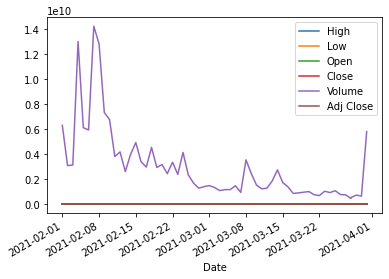

In [29]:
doge = df
doge.plot()

In [30]:
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2021-02-01,0.034875
2021-02-02,0.031520
2021-02-03,0.037120
2021-02-04,0.053289
2021-02-05,0.046935


In [31]:
# Prever n dias no futuro
predic_day = 25 #7 dias

# cria uma coluna previsao com dados dos proximos 7. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 7 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [32]:
doge.head()

,Close,Prediction
Date,,
2021-02-01,0.034875,0.050480
2021-02-02,0.031520,0.050083
2021-02-03,0.037120,0.048052
2021-02-04,0.053289,0.050599
2021-02-05,0.046935,0.050262


In [33]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.034875],
       [0.03152 ],
       [0.03712 ],
       [0.053289],
       [0.046935],
       [0.057595],
       [0.078782],
       [0.078825],
       [0.07007 ],
       [0.072896],
       [0.069676],
       [0.070069],
       [0.06645 ],
       [0.062537],
       [0.056591],
       [0.05352 ],
       [0.049376],
       [0.059541],
       [0.055139],
       [0.054384],
       [0.05598 ],
       [0.053725],
       [0.047392],
       [0.056555],
       [0.050167],
       [0.05048 ],
       [0.050083],
       [0.048052],
       [0.050599],
       [0.050262],
       [0.050592],
       [0.050048],
       [0.049609],
       [0.050984]])

In [34]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.05048 , 0.050083, 0.048052, 0.050599, 0.050262, 0.050592,
       0.050048, 0.049609, 0.050984, 0.052122, 0.061949, 0.057998,
       0.056004, 0.055918, 0.055349, 0.062432, 0.058592, 0.057088,
       0.058607, 0.057653, 0.057383, 0.058328, 0.058961, 0.057234,
       0.054962, 0.053556, 0.051702, 0.051448, 0.053952, 0.054377,
       0.053698, 0.054052, 0.0539  , 0.053657])

In [35]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [36]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.7622685021987228


In [37]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.051702  0.051553  0.0538045 0.058592  0.0490675 0.054457  0.050262 ]

Os valores reais para Doge Coin sao: [0.054052 0.057998 0.053698 0.0539   0.05048  0.053556 0.058961]


In [38]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(25)["Close"])


In [39]:
x_val #os ultimos 7 valores utilizados para realizar a previsao.

[0.0696759968996048,
 0.07006900012493134,
 0.06644999980926514,
 0.06253699958324432,
 0.05659100040793419,
 0.05352000147104263,
 0.049375999718904495,
 0.0595409981906414,
 0.055139001458883286,
 0.05438400059938431,
 0.055980000644922256,
 0.053725000470876694,
 0.04739199951291084,
 0.05655499920248985,
 0.05016700178384781,
 0.05048000067472458,
 0.05008300021290779,
 0.04805200174450874,
 0.050599001348018646,
 0.050262000411748886,
 0.050592001527547836,
 0.05004800111055374,
 0.049609001725912094,
 0.05098399892449379,
 0.052122000604867935]

In [40]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(25)["Prediction"]) 

Previsto: [0.0570355]
Previsto: [0.051553]
Previsto: [0.056004]
Previsto: [0.055918]
Previsto: [0.057383]
Previsto: [0.058328]
Previsto: [0.058592]
Previsto: [0.056503]
Previsto: [0.058607]
Previsto: [0.0579905]
Previsto: [0.057383]
Previsto: [0.058328]
Previsto: [0.050262]
Previsto: [0.057383]
Previsto: [0.054962]
Previsto: [0.054457]
Previsto: [0.051702]
Previsto: [0.051448]
Previsto: [0.0538045]
Previsto: [0.054962]
Previsto: [0.0538045]
Previsto: [0.051702]
Previsto: [0.058592]
Previsto: [0.0538045]
Previsto: [0.052128]
----------
Preco Anterior Date
2021-02-11    0.061949
2021-02-12    0.057998
2021-02-13    0.056004
2021-02-14    0.055918
2021-02-15    0.055349
2021-02-16    0.062432
2021-02-17    0.058592
2021-02-18    0.057088
2021-02-19    0.058607
2021-02-20    0.057653
2021-02-21    0.057383
2021-02-22    0.058328
2021-02-23    0.058961
2021-02-24    0.057234
2021-02-25    0.054962
2021-02-26    0.053556
2021-02-27    0.051702
2021-02-28    0.051448
2021-03-01    0.053952
20

### Marco 2021:

In [41]:
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-03-01', end='2021-04-30') 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-01,0.051479,0.048029,0.048070,0.050599,1494427207,0.050599
2021-03-02,0.052382,0.049299,0.050596,0.050262,1346282318,0.050262
2021-03-03,0.052126,0.050078,0.050278,0.050592,1093877445,0.050592
2021-03-04,0.051087,0.047879,0.050587,0.050048,1170617084,0.050048
2021-03-05,0.050854,0.048147,0.050028,0.049609,1173113591,0.049609


<AxesSubplot:xlabel='Date'>

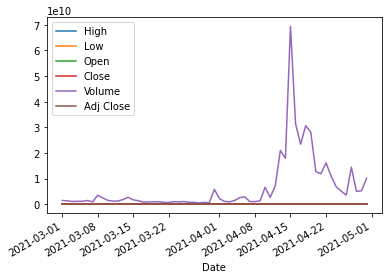

In [42]:
doge = df
doge.plot()

In [43]:
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2021-03-01,0.050599
2021-03-02,0.050262
2021-03-03,0.050592
2021-03-04,0.050048
2021-03-05,0.049609


In [44]:
# Prever n dias no futuro
predic_day = 25 #7 dias

# cria uma coluna previsao com dados dos proximos 7. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 7 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [45]:
doge.head()

,Close,Prediction
Date,,
2021-03-01,0.050599,0.053952
2021-03-02,0.050262,0.054377
2021-03-03,0.050592,0.053698
2021-03-04,0.050048,0.054052
2021-03-05,0.049609,0.053900


In [46]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.050599],
       [0.050262],
       [0.050592],
       [0.050048],
       [0.049609],
       [0.050984],
       [0.052122],
       [0.061949],
       [0.057998],
       [0.056004],
       [0.055918],
       [0.055349],
       [0.062432],
       [0.058592],
       [0.057088],
       [0.058607],
       [0.057653],
       [0.057383],
       [0.058328],
       [0.058961],
       [0.057234],
       [0.054962],
       [0.053556],
       [0.051702],
       [0.051448],
       [0.053952],
       [0.054377],
       [0.053698],
       [0.054052],
       [0.0539  ],
       [0.053657],
       [0.061986],
       [0.057664],
       [0.055804],
       [0.057404],
       [0.059696]])

In [47]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.053952  , 0.054377  , 0.053698  , 0.054052  , 0.0539    ,
       0.053657  , 0.061986  , 0.057664  , 0.055804  , 0.057404  ,
       0.059696  , 0.064458  , 0.059028  , 0.061464  , 0.061684  ,
       0.063845  , 0.074649  , 0.070767  , 0.093445  , 0.121517  ,
       0.182207  , 0.36587   , 0.28417301, 0.32047501, 0.407318  ,
       0.3195    , 0.306925  , 0.26096699, 0.248509  , 0.27021199,
       0.251111  , 0.27067399, 0.27218801, 0.32368201, 0.30516899,
       0.33756101])

In [48]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [49]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.6796212904483576


In [50]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.407318  0.3195    0.230635  0.230635  0.058346  0.078645  0.2853055
 0.407318 ]

Os valores reais para Doge Coin sao: [0.061986   0.27021199 0.053657   0.053698   0.27067399 0.061464
 0.28417301 0.32047501]


In [51]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(25)["Close"])


In [52]:
x_val #os ultimos 7 valores utilizados para realizar a previsao.

[0.062431998550891876,
 0.05859199911355972,
 0.05708799883723259,
 0.05860700085759163,
 0.057652998715639114,
 0.05738300085067749,
 0.05832799896597862,
 0.05896100029349327,
 0.05723400041460991,
 0.054962001740932465,
 0.05355599895119667,
 0.051702000200748444,
 0.051447998732328415,
 0.05395200103521347,
 0.0543770007789135,
 0.05369799956679344,
 0.054051999002695084,
 0.05389999970793724,
 0.05365699902176857,
 0.06198599934577942,
 0.05766399949789047,
 0.05580399930477142,
 0.05740400031208992,
 0.059696000069379807,
 0.06445799767971039]

In [53]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(25)["Prediction"]) 

Previsto: [0.059028]
Previsto: [0.078645]
Previsto: [0.061684]
Previsto: [0.078645]
Previsto: [0.1734185]
Previsto: [0.30516899]
Previsto: [0.078645]
Previsto: [0.121517]
Previsto: [0.182207]
Previsto: [0.36587]
Previsto: [0.2853055]
Previsto: [0.407318]
Previsto: [0.407318]
Previsto: [0.3195]
Previsto: [0.306925]
Previsto: [0.29023349]
Previsto: [0.3195]
Previsto: [0.3195]
Previsto: [0.2853055]
Previsto: [0.058346]
Previsto: [0.27218801]
Previsto: [0.19054301]
Previsto: [0.30516899]
Previsto: [0.33756101]
Previsto: [0.059028]
----------
Preco Anterior Date
2021-03-13    0.059028
2021-03-14    0.061464
2021-03-15    0.061684
2021-03-16    0.063845
2021-03-17    0.074649
2021-03-18    0.070767
2021-03-19    0.093445
2021-03-20    0.121517
2021-03-21    0.182207
2021-03-22    0.365870
2021-03-23    0.284173
2021-03-24    0.320475
2021-03-25    0.407318
2021-03-26    0.319500
2021-03-27    0.306925
2021-03-28    0.260967
2021-03-28    0.248509
2021-03-29    0.270212
2021-03-30    0.251111

### Abril 2021:

In [54]:
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-04-01', end='2021-05-31') 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-31,0.070111,0.053644,0.053655,0.061986,5816046822,0.061986
2021-04-01,0.062249,0.057333,0.061968,0.057664,2166925111,0.057664
2021-04-02,0.059484,0.055804,0.057658,0.055804,1136931403,0.055804
2021-04-03,0.058107,0.055295,0.055776,0.057404,938035097,0.057404
2021-04-04,0.060153,0.056435,0.057411,0.059696,1513832721,0.059696


<AxesSubplot:xlabel='Date'>

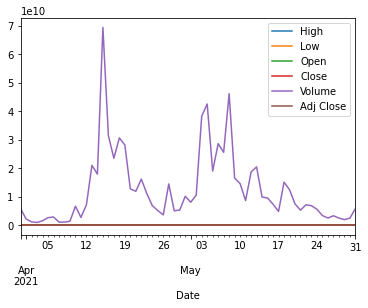

In [55]:
doge = df
doge.plot()

In [56]:
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2021-03-31,0.061986
2021-04-01,0.057664
2021-04-02,0.055804
2021-04-03,0.057404
2021-04-04,0.059696


In [57]:
# Prever n dias no futuro
predic_day = 25 #7 dias

# cria uma coluna previsao com dados dos proximos 7. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 7 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [58]:
doge.head()

,Close,Prediction
Date,,
2021-03-31,0.061986,0.270674
2021-04-01,0.057664,0.272188
2021-04-02,0.055804,0.323682
2021-04-03,0.057404,0.305169
2021-04-04,0.059696,0.337561


In [59]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.061986  ],
       [0.057664  ],
       [0.055804  ],
       [0.057404  ],
       [0.059696  ],
       [0.064458  ],
       [0.059028  ],
       [0.061464  ],
       [0.061684  ],
       [0.063845  ],
       [0.074649  ],
       [0.070767  ],
       [0.093445  ],
       [0.121517  ],
       [0.182207  ],
       [0.36587   ],
       [0.28417301],
       [0.32047501],
       [0.407318  ],
       [0.3195    ],
       [0.306925  ],
       [0.26096699],
       [0.248509  ],
       [0.27021199],
       [0.251111  ],
       [0.27067399],
       [0.27218801],
       [0.32368201],
       [0.30516899],
       [0.33756101],
       [0.39298701],
       [0.376046  ],
       [0.44170699],
       [0.54133397],
       [0.65763301],
       [0.58080399]])

In [60]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.27067399, 0.27218801, 0.32368201, 0.30516899, 0.33756101,
       0.39298701, 0.376046  , 0.44170699, 0.54133397, 0.65763301,
       0.58080399, 0.68477702, 0.63643903, 0.57007003, 0.44996399,
       0.495231  , 0.38537601, 0.490374  , 0.55960399, 0.507972  ,
       0.51489502, 0.487892  , 0.47611499, 0.333123  , 0.40019399,
       0.359382  , 0.34237099, 0.30807099, 0.366162  , 0.346302  ,
       0.35369301, 0.33294499, 0.311205  , 0.30311   , 0.30222401,
       0.32580999])

In [61]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [62]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.8096612010688551


In [63]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.507972   0.34237099 0.47611499 0.58080399 0.507972   0.3396235
 0.3508765  0.27218801]

Os valores reais para Doge Coin sao: [0.366162   0.38537601 0.40019399 0.68477702 0.51489502 0.55960399
 0.333123   0.376046  ]


In [64]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(25)["Close"])


In [65]:
x_val #os ultimos 7 valores utilizados para realizar a previsao.

[0.09344500303268433,
 0.12151700258255005,
 0.18220700323581696,
 0.36586999893188477,
 0.28417301177978516,
 0.3204750120639801,
 0.40731799602508545,
 0.31949999928474426,
 0.3069249987602234,
 0.2609669864177704,
 0.2485090047121048,
 0.27021199464797974,
 0.2511110007762909,
 0.2706739902496338,
 0.2721880078315735,
 0.3236820101737976,
 0.3051689863204956,
 0.3375610113143921,
 0.3929870128631592,
 0.37604600191116333,
 0.44170698523521423,
 0.5413339734077454,
 0.6576330065727234,
 0.5808039903640747,
 0.684777021408081]

In [66]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(25)["Prediction"]) 

Previsto: [0.63643903]
Previsto: [0.63643903]
Previsto: [0.46303949]
Previsto: [0.3396235]
Previsto: [0.34237099]
Previsto: [0.499173]
Previsto: [0.3396235]
Previsto: [0.507972]
Previsto: [0.507972]
Previsto: [0.41513149]
Previsto: [0.47611499]
Previsto: [0.3508765]
Previsto: [0.47611499]
Previsto: [0.3508765]
Previsto: [0.34237099]
Previsto: [0.30807099]
Previsto: [0.507972]
Previsto: [0.346302]
Previsto: [0.3396235]
Previsto: [0.3396235]
Previsto: [0.3071575]
Previsto: [0.30311]
Previsto: [0.314017]
Previsto: [0.32580999]
Previsto: [0.314017]
----------
Preco Anterior Date
2021-04-12    0.636439
2021-04-13    0.570070
2021-04-14    0.449964
2021-04-15    0.495231
2021-04-16    0.385376
2021-04-17    0.490374
2021-04-18    0.559604
2021-04-19    0.507972
2021-04-20    0.514895
2021-04-21    0.487892
2021-04-22    0.476115
2021-04-23    0.333123
2021-04-24    0.400194
2021-04-25    0.359382
2021-04-26    0.342371
2021-04-27    0.308071
2021-04-28    0.366162
2021-04-29    0.346302
2021

### Maio 2021:

In [67]:
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-05-01', end='2021-06-06') 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-30,0.397135,0.328290,0.337559,0.392987,10123343703,0.392987
2021-05-01,0.400029,0.364874,0.391087,0.376046,8040406918,0.376046
2021-05-02,0.445567,0.373631,0.373631,0.441707,10526649978,0.441707
2021-05-03,0.605998,0.400800,0.440274,0.541334,38238126181,0.541334
2021-05-04,0.695262,0.523822,0.537355,0.657633,42525098292,0.657633


<AxesSubplot:xlabel='Date'>

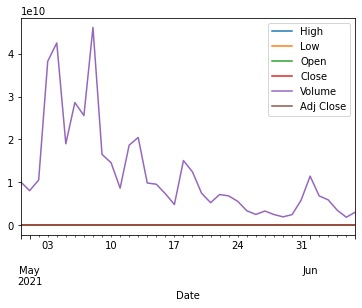

In [68]:
doge = df
doge.plot()

In [69]:
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2021-04-30,0.392987
2021-05-01,0.376046
2021-05-02,0.441707
2021-05-03,0.541334
2021-05-04,0.657633


In [70]:
# Prever n dias no futuro
predic_day = 25 #7 dias

# cria uma coluna previsao com dados dos proximos 7. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 7 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [71]:
doge.head()

,Close,Prediction
Date,,
2021-04-30,0.392987,0.353693
2021-05-01,0.376046,0.332945
2021-05-02,0.441707,0.311205
2021-05-03,0.541334,0.303110
2021-05-04,0.657633,0.302224


In [72]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.39298701],
       [0.376046  ],
       [0.44170699],
       [0.54133397],
       [0.65763301],
       [0.58080399],
       [0.68477702],
       [0.63643903],
       [0.57007003],
       [0.44996399],
       [0.495231  ],
       [0.38537601]])

In [73]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.35369301, 0.33294499, 0.311205  , 0.30311   , 0.30222401,
       0.32580999, 0.37007701, 0.423374  , 0.39996299, 0.37632301,
       0.372177  , 0.37180701])

In [74]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [75]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.31049305021818074


In [76]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.311205   0.3071575  0.35369301]

Os valores reais para Doge Coin sao: [0.37632301 0.372177   0.37180701]


In [77]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(25)["Close"])


In [78]:
x_val #os ultimos 7 valores utilizados para realizar a previsao.

[0.3929870128631592,
 0.37604600191116333,
 0.44170698523521423,
 0.5413339734077454,
 0.6576330065727234,
 0.5808039903640747,
 0.684777021408081,
 0.6364390254020691,
 0.5700700283050537,
 0.4499639868736267,
 0.4952310025691986,
 0.3853760063648224,
 0.49037399888038635]

In [79]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(25)["Prediction"]) 

Previsto: [0.35369301]
Previsto: [0.33294499]
Previsto: [0.311205]
Previsto: [0.3515365]
Previsto: [0.362799]
Previsto: [0.32580999]
Previsto: [0.39672551]
Previsto: [0.362799]
Previsto: [0.39996299]
Previsto: [0.311205]
Previsto: [0.3071575]
Previsto: [0.35369301]
Previsto: [0.311205]
----------
Preco Anterior Date
2021-04-30    0.353693
2021-05-01    0.332945
2021-05-02    0.311205
2021-05-03    0.303110
2021-05-04    0.302224
2021-05-05    0.325810
2021-05-06    0.370077
2021-05-07    0.423374
2021-05-08    0.399963
2021-05-09    0.376323
2021-05-10    0.372177
2021-05-11    0.371807
2021-05-12    0.331050
Name: Prediction, dtype: float64
